In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk


In [3]:
import re
from nltk.corpus  import wordnet
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])
df_0=df[df["label"]==0].sample(5000)
df_1=df[df["label"]==1].sample(5000)


C:\Users\zas\AppData\Local\Temp\ipykernel_8932\1975891199.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])


In [5]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [6]:
data=pd.concat([df_0,df_1])
data.head()

,title,text,label
48654,U.S. health secretary to brief lawmakers on ef...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,0
17425,Afghanistan: 19 die in air attacks on hospital...,(CNN) Aerial bombardments blew apart a Doctors...,0
5431,Trumpâs Inaugural Parade Lineup: Border Patr...,The Presidential Inaugural Committee announced...,0
75024,South Korean foreign minister says North Korea...,SEOUL (Reuters) - South Korean Foreign Ministe...,0
18103,Austria ex-finance minister goes on trial accu...,VIENNA (Reuters) - An Austrian former finance ...,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 48654 to 69992
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9927 non-null   object
 1   text    9995 non-null   object
 2   label   10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


In [8]:
data.isna().sum()

title    73
text      5
label     0
dtype: int64

In [9]:
len(data.columns)

3

In [10]:
data.dropna(inplace=True)
data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
data.reset_index(inplace=True)
data.head()

,index,title,text,label
0,48654,U.S. health secretary to brief lawmakers on ef...,WASHINGTON (Reuters) - U.S. Senate Majority Le...,0
1,17425,Afghanistan: 19 die in air attacks on hospital...,(CNN) Aerial bombardments blew apart a Doctors...,0
2,5431,Trumpâs Inaugural Parade Lineup: Border Patr...,The Presidential Inaugural Committee announced...,0
3,75024,South Korean foreign minister says North Korea...,SEOUL (Reuters) - South Korean Foreign Ministe...,0
4,18103,Austria ex-finance minister goes on trial accu...,VIENNA (Reuters) - An Austrian former finance ...,0


In [12]:
data.shape

(9922, 4)

In [13]:
X=data.drop("label",axis=1)
y=data.label

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: object

In [15]:
messages = X.copy()

In [16]:
messages.head()

,index,title,text
0,48654,U.S. health secretary to brief lawmakers on ef...,WASHINGTON (Reuters) - U.S. Senate Majority Le...
1,17425,Afghanistan: 19 die in air attacks on hospital...,(CNN) Aerial bombardments blew apart a Doctors...
2,5431,Trumpâs Inaugural Parade Lineup: Border Patr...,The Presidential Inaugural Committee announced...
3,75024,South Korean foreign minister says North Korea...,SEOUL (Reuters) - South Korean Foreign Ministe...
4,18103,Austria ex-finance minister goes on trial accu...,VIENNA (Reuters) - An Austrian former finance ...


In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
corpus=[]
for  var in range(len(messages)):
   review=re.sub("[^a-zA-Z0_9]"," ",messages["text"][var])
   review=review.lower()
   review=review.split()
   review=[lm.lemmatize(x) for x in review if  x not in  stopwords.words("english")]
   review=" ".join(review)
   corpus.append(review)

In [18]:
corpus[0:5]

['washington reuters u senate majority leader mitch mcconnell said wednesday invited u health human service secretary sylvia burwell brief lawmaker effort zika virus mcconnell speaking senate floor said increasing amount concern virus warmer month approach think could benefit better understanding preparation made protect american said asked burwell brief relevant senate committee leader party next week',
 'cnn aerial bombardment blew apart doctor without border hospital battleground afghan city kunduz time u airstrike early saturday killing least 9 people official said blast left part hospital flame rubble killing staffer seven patient including three child injuring people charity said united state said investigating struck hospital night charity expressed shock demanded answer stressing combatant told long ago hospital bombing constitutes grave violation international humanitarian law doctor without border known internationally medecins sans frontieres msf said running hospital treati

In [19]:
print(sum(len(var.split())for var in corpus))

3048087


In [20]:
print(max(len(var.split()) for var in corpus))

4119


In [21]:
len(corpus)

9922

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
x=tfidf.fit_transform(corpus).toarray()


In [23]:
y = data["label"]
y=y.astype(np.int32())
y.dtype


dtype('int32')

In [24]:
y.isna().sum()

0

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# y_train.isna().sum()
# y_train.dtype

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

RandomForestClassifier
              precision    recall  f1-score   support

           0     0.9211    0.9111    0.9160      1012
           1     0.9085    0.9188    0.9136       973

    accuracy                         0.9149      1985
   macro avg     0.9148    0.9149    0.9148      1985
weighted avg     0.9149    0.9149    0.9149      1985



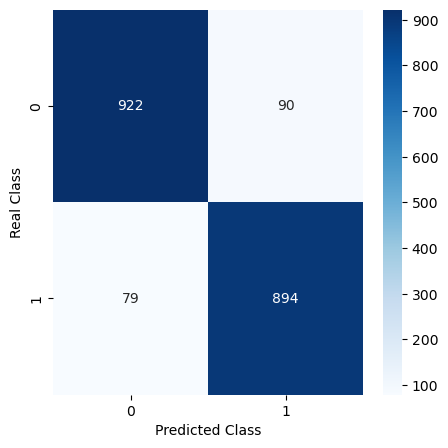

In [28]:
y_pred_rfc=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
print("RandomForestClassifier")
print(classification_report(y_test,y_pred_rfc,digits=4))
cm=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()



In [29]:
from sklearn.naive_bayes import MultinomialNB
mtnb=MultinomialNB()
mtnb.fit(X_train,y_train)


MultinomialNB()

MultinomialNB
              precision    recall  f1-score   support

           0     0.9211    0.9111    0.9160      1012
           1     0.9085    0.9188    0.9136       973

    accuracy                         0.9149      1985
   macro avg     0.9148    0.9149    0.9148      1985
weighted avg     0.9149    0.9149    0.9149      1985



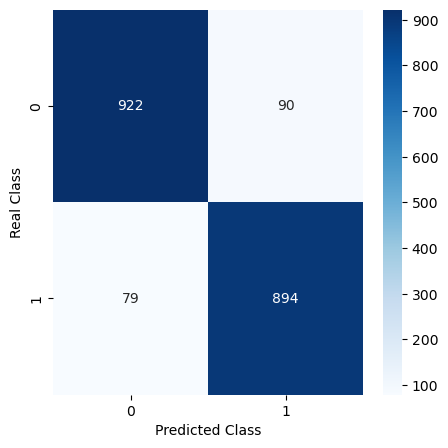

In [30]:
y_pred_mtnb=rfc.predict(X_test)

print("MultinomialNB")
print(classification_report(y_test,y_pred_mtnb,digits=4))
cm=confusion_matrix(y_test,y_pred_mtnb)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

logistic_regression=LogisticRegression()
svm=SVC()
sgdclassifier=SGDClassifier()
dtc=DecisionTreeClassifier()
xgboost=XGBClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
sgdclassifier.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

models=[logistic_regression,svm,sgdclassifier,dtc,xgboost,gradient_boosting,adaboost]
models_names=["Logistic Regression","SVC","SGD Classifier","Decision Tree Classifier","XG Boosting Classifier",
              "Gradient Boosting Classifier","Ada Boost Classifier"]
for name,model  in zip(models_names,models):
  print(f"----------{name}-------")
  print(f" accuracy_score  {accuracy_score(y_test,model.predict(X_test))}")
  print(f" precision_score  {precision_score(y_test,model.predict(X_test))}")
  print(f" recall_score  {recall_score(y_test,model.predict(X_test))}")
  print(f" f1_score  {f1_score(y_test,model.predict(X_test))}")
  print("\n")






----------Logistic Regression-------
 accuracy_score  0.9143576826196473
 precision_score  0.8979187314172448
 recall_score  0.9311408016443987
 f1_score  0.9142280524722501


----------SVC-------
 accuracy_score  0.9254408060453401
 precision_score  0.908820614469772
 recall_score  0.9424460431654677
 f1_score  0.9253279515640767


----------SGD Classifier-------
 accuracy_score  0.9279596977329975
 precision_score  0.923469387755102
 recall_score  0.9301130524152107
 f1_score  0.9267793138760881


----------Decision Tree Classifier-------
 accuracy_score  0.8685138539042822
 precision_score  0.8692946058091287
 recall_score  0.8612538540596094
 f1_score  0.8652555498193083


----------XG Boosting Classifier-------
 accuracy_score  0.9360201511335012
 precision_score  0.9264112903225806
 recall_score  0.9445015416238438
 f1_score  0.9353689567430026


----------Gradient Boosting Classifier-------
 accuracy_score  0.9138539042821159
 precision_score  0.8863198458574181
 recall_score  0

In [32]:
ensemble=VotingClassifier(estimators=[
            ("svm",svm),("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
],voting="hard")
ensemble.fit(X_train,y_train)


VotingClassifier(estimators=[('svm', SVC()), ('dtc', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('sgdclassifier', SGDClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stoppin...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                          

--- Ensemble (Voting Classifier) ---
Accuracy: 0.9370277078085643
Precision: 0.9214711729622267
Recall: 0.9527235354573484
F1 Score: 0.9368367862556848
              precision    recall  f1-score   support

           0     0.9530    0.9219    0.9372      1012
           1     0.9215    0.9527    0.9368       973

    accuracy                         0.9370      1985
   macro avg     0.9372    0.9373    0.9370      1985
weighted avg     0.9376    0.9370    0.9370      1985



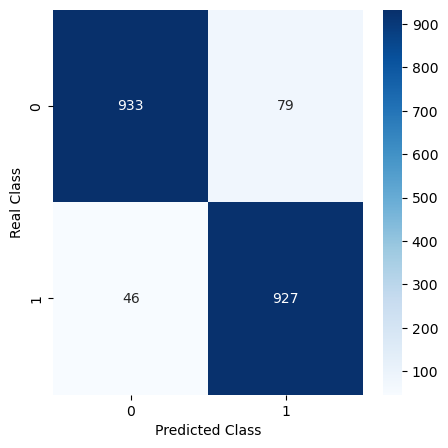

In [33]:
y_pred_ensemble = ensemble.predict(X_test)

print("--- Ensemble (Voting Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

print(classification_report(y_test,y_pred_ensemble,digits=4))
cm=confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [34]:
from sklearn.ensemble import StackingClassifier

models_level_0=[
           ("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
            ,("mtnb",mtnb)
]
final_level=SVC()
stacking_classifier=StackingClassifier(
            estimators=models_level_0,
            final_estimator=final_level,
            n_jobs=-1,
           
)
stacking_classifier.fit(X_train,y_train)


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('logistic_regression', LogisticRegression()),
                               ('sgdclassifier', SGDClassifier()),
                               ('adaboost', AdaBoostClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=Non...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_st

--- Stacking Classifier ---
Accuracy: 0.9435768261964735
Precision: 0.9292123629112662
Recall: 0.9578622816032888
F1 Score: 0.9433198380566802
              precision    recall  f1-score   support

           0     0.9582    0.9298    0.9438      1012
           1     0.9292    0.9579    0.9433       973

    accuracy                         0.9436      1985
   macro avg     0.9437    0.9439    0.9436      1985
weighted avg     0.9440    0.9436    0.9436      1985



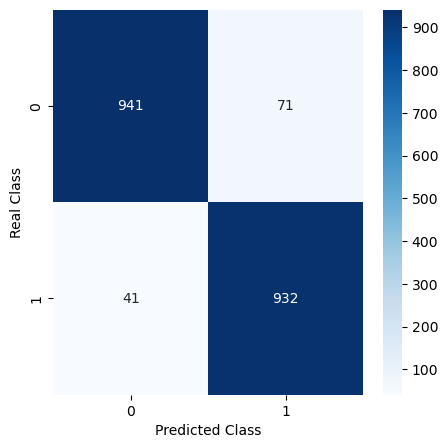

In [35]:
y_pred_stacking = stacking_classifier.predict(X_test)
print("--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))
print(classification_report(y_test,y_pred_stacking,digits=4))
cm=confusion_matrix(y_test,y_pred_stacking)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()